In [1]:
#JANNAT BUTT
#21I-0259
#AI-K


In [243]:
pip install pytesseract

In [244]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaseEnsemble
import seaborn as sn
from os import listdir
import cv2
from sklearn.neighbors import KNeighborsClassifier
from skimage import filters
from PIL import Image
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import warnings
import nltk
from skimage import feature
import skimage
from nltk.corpus import stopwords
import string
from PIL import Image
from pytesseract import pytesseract
from sklearn.svm import LinearSVC
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score,recall_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import re
from sklearn.ensemble import AdaBoostClassifier
from PIL import Image
from PIL import ImageFile
import pickle
from sklearn.naive_bayes import GaussianNB
from skimage.io import imread,imshow
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings('ignore')

# Loading Excel Data

In [3]:
orig_data=pd.read_csv("labels.csv",usecols=["image_name","overall_sentiment"])
orig_data.overall_sentiment[orig_data.overall_sentiment=="very_positive"]=1
orig_data.overall_sentiment[orig_data.overall_sentiment=="positive"]=1
orig_data.overall_sentiment[orig_data.overall_sentiment=="negative"]=-1
orig_data.overall_sentiment[orig_data.overall_sentiment=="very_negative"]=-1
orig_data.overall_sentiment[orig_data.overall_sentiment=="neutral"]=0
orig_data

,image_name,overall_sentiment
0,image_1.jpg,1
1,image_2.jpeg,1
2,image_3.JPG,1
3,image_4.png,1
4,image_5.png,0
...,...,...
6987,image_6988.jpg,0
6988,image_6989.jpg,0
6989,image_6990.png,1
6990,image_6991.jpg,1


# Loading Images using imread

In [ ]:
image_Matrix=[]
image_names=[]
image_labels=[]
image_count=0
image_path =r"C:\Users\jannat butt\OneDrive\Desktop\PAI THEORY\images\\"
for index in range(len(orig_data)):
    try:
        image =imread(image_path+"\\"+orig_data.iloc[index]["image_name"],as_gray=True)
        image=skimage.transform.resize(image,(130,130))
        image_Matrix.append(image)
        image_names.append(orig_data.iloc[index]["image_name"])
        image_labels.append(orig_data.iloc[index]["overall_sentiment"])
        print(image_count)
        image_count+=1
    except:
        print("img error")

In [5]:
print(image_Matrix[0].ndim)

2


# Flatten array using Ravel

In [ ]:
oneD_images_Matrix=image_Matrix.copy()
for index in range(len(image_Matrix)):
        oneD_images_Matrix[index]=oneD_images_Matrix[index].ravel()
oneD_images_Matrix

# Data Frame 

In [7]:
images_features=pd.DataFrame(list(zip(oneD_images_Matrix,image_names,image_labels)),columns=["im_ReadFeatures","image_Name","Labels"])
images_features

,im_ReadFeatures,image_Name,Labels
0,"[0.4126143410768218, 0.41253159467404676, 0.41...",image_1.jpg,1
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.999997523793219, 0...",image_2.jpeg,1
2,"[0.1704527567933269, 0.13400727225304232, 0.16...",image_3.JPG,1
3,"[0.42737853001873793, 0.4240776419554474, 0.42...",image_4.png,1
4,"[0.9842700484043511, 0.9848068260710845, 0.983...",image_5.png,0
...,...,...,...
6986,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",image_6988.jpg,0
6987,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",image_6989.jpg,0
6988,"[0.6761764305261445, 0.6759322400520339, 0.675...",image_6990.png,1
6989,"[0.5686293691409842, 0.5873897141976353, 0.597...",image_6991.jpg,1


# Writing Images Features Data to file

In [8]:
images_feature=images_features.to_csv("features_images.csv",index=False)

In [9]:
images_feature=pd.read_csv("features_images.csv")
images_feature

,im_ReadFeatures,image_Name,Labels
0,[0.41261434 0.41253159 0.41244625 ... 0.342019...,image_1.jpg,1
1,[1. 1. 1. ... 0.999999...,image_2.jpeg,1
2,[0.17045276 0.13400727 0.16697388 ... 0.498039...,image_3.JPG,1
3,[0.42737853 0.42407764 0.42946246 ... 1. ...,image_4.png,1
4,[0.98427005 0.98480683 0.98355231 ... 1. ...,image_5.png,0
...,...,...,...
6986,[1. 1. 1. ... 1. 1. 1.],image_6988.jpg,0
6987,[0. 0. 0. ... 0. 0. 0.],image_6989.jpg,0
6988,[0.67617643 0.67593224 0.67572338 ... 1. ...,image_6990.png,1
6989,[0.56862937 0.58738971 0.59778571 ... 0.656045...,image_6991.jpg,1


# Applying Canny ,Sobel Filter

In [ ]:
canny_features=[]
for index in range(len(image_Matrix)):
    cany = feature.canny(image_Matrix[index])
    canny_features.append(cany)
canny_features
sobel_features=[]
for index in range(len(image_Matrix)):
    sobel=filters.sobel(image_Matrix[index])
    sobel_features.append(sobel)
sobel_features

# Flatten Cany  Sobel features

In [ ]:
oneD_canny=canny_features.copy()
for index in range(len(canny_features)):
        oneD_canny[index]=oneD_canny[index].ravel()
oneD_canny

oneD_sobel=sobel_features.copy()
for index in range(len(sobel_features)):
        oneD_sobel[index]=oneD_sobel[index].ravel()
oneD_sobel

In [12]:
images_feature["Cany Features"]=oneD_canny
images_feature["Sobel Features"]=oneD_sobel
images_feature

,im_ReadFeatures,image_Name,Labels,Cany Features,Sobel Features
0,[0.41261434 0.41253159 0.41244625 ... 0.342019...,image_1.jpg,1,"[False, False, False, False, False, False, Fal...","[0.0002531137519810675, 0.0005312801170071238,..."
1,[1. 1. 1. ... 0.999999...,image_2.jpeg,1,"[False, False, False, False, False, False, Fal...","[0.0, 0.0, 0.0, 0.0, 1.7887372623913358e-06, 0..."
2,[0.17045276 0.13400727 0.16697388 ... 0.498039...,image_3.JPG,1,"[False, False, False, False, False, False, Fal...","[0.02569923893212562, 0.002075157445063326, 0...."
3,[0.42737853 0.42407764 0.42946246 ... 1. ...,image_4.png,1,"[False, False, False, False, False, False, Fal...","[0.003989978780297666, 0.0035649669555833227, ..."
4,[0.98427005 0.98480683 0.98355231 ... 1. ...,image_5.png,0,"[False, False, False, False, False, False, Fal...","[0.10410230026075094, 0.1038855844306842, 0.10..."
...,...,...,...,...,...
6986,[1. 1. 1. ... 1. 1. 1.],image_6988.jpg,0,"[False, False, False, False, False, False, Fal...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628..."
6987,[0. 0. 0. ... 0. 0. 0.],image_6989.jpg,0,"[False, False, False, False, False, False, Fal...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6988,[0.67617643 0.67593224 0.67572338 ... 1. ...,image_6990.png,1,"[False, False, False, False, False, False, Fal...","[0.004319784289716906, 0.0028221702385082333, ..."
6989,[0.56862937 0.58738971 0.59778571 ... 0.656045...,image_6991.jpg,1,"[False, False, False, False, False, False, Fal...","[0.013516037021624428, 0.019973625009540256, 0..."


# Making sobel and canny as single values

In [13]:
canny_featSplit=images_feature["Cany Features"].apply(pd.Series)
sobel_featSplit=images_feature["Sobel Features"].apply(pd.Series)

In [ ]:
sobel_featSplit

# Writing sobel cany to files

In [32]:
sobel_featSplit=sobel_featSplit.to_csv("sobel_featSpli.csv",index=False)
sobel_featSplit

canny_featSplit=canny_featSplit.to_csv("canny_featSplit.csv",index=False)
canny_featSplit

# Reading Features 

In [ ]:
sobel_featSplit=pd.read_csv("sobel_featSpli.csv")
sobel_featSplit

In [ ]:
canny_featSplit=pd.read_csv("canny_featSplit.csv")
canny_featSplit

# test train split Canny

In [239]:
X=canny_featSplit
y=images_feature["Labels"].astype("int")

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=50)


print('Shape of X_train:', X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
#target
target=["Positive","Negative","Neutral"]

Shape of X_train: (5592, 16900)
Shape of X_test: (1399, 16900)
Shape of y_train: (5592,)
Shape of y_test: (1399,)


# MultiNomial Model

In [15]:
multi_model=MultinomialNB()
multi_model=multi_model.fit(X_train,y_train)
multi_model

MultinomialNB()

In [16]:
multi_model_y_pred=multi_model.predict(X_test)
multi_model_y_pred

array([ 1,  1, -1, ...,  0,  1, -1])

[[ 22  44  59]
 [ 36 164 229]
 [ 93 301 451]]
              precision    recall  f1-score   support

    Positive       0.15      0.18      0.16       125
    Negative       0.32      0.38      0.35       429
     Neutral       0.61      0.53      0.57       845

    accuracy                           0.46      1399
   macro avg       0.36      0.36      0.36      1399
weighted avg       0.48      0.46      0.47      1399

F1_Score: 0.3595149682917366
Accuracy: 0.455325232308792


<Figure size 720x504 with 0 Axes>

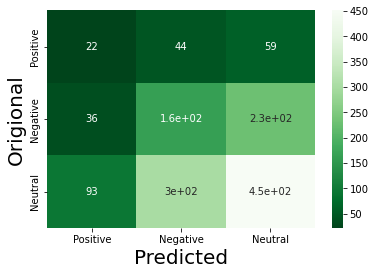

<Figure size 720x504 with 0 Axes>

In [17]:
confus_m = pd.DataFrame(confusion_matrix (y_test,multi_model_y_pred), index = [index_val for index_val in target],
              columns = [index_val for index_val in target])

sn.heatmap(confus_m, annot=True,cmap= "Greens_r")
print(confusion_matrix (y_test,multi_model_y_pred))
print(classification_report(y_test,multi_model_y_pred,target_names=target))
print("F1_Score:",f1_score(y_test,multi_model_y_pred,average="macro"))
print("Accuracy:",accuracy_score(y_test,multi_model_y_pred))

plt.ylabel("Origional",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.figure(figsize = (10,7))

# LinearDiscriminantAnalysis with Canny

In [18]:
lda=LinearDiscriminantAnalysis()
lda=lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [ ]:
lda_y_pred=lda.predict(X_test)
lda_y_pred

[[  7  36  82]
 [ 22 167 240]
 [ 51 284 510]]
              precision    recall  f1-score   support

    Positive       0.09      0.06      0.07       125
    Negative       0.34      0.39      0.36       429
     Neutral       0.61      0.60      0.61       845

    accuracy                           0.49      1399
   macro avg       0.35      0.35      0.35      1399
weighted avg       0.48      0.49      0.49      1399

F1_Score: 0.3470501614031772
Accuracy: 0.4889206576125804


<Figure size 720x504 with 0 Axes>

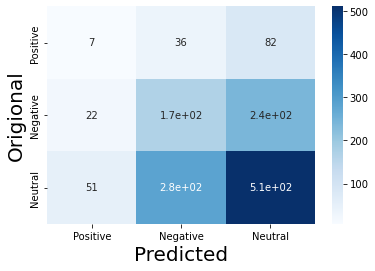

<Figure size 720x504 with 0 Axes>

In [20]:
confus_m = pd.DataFrame(confusion_matrix (y_test,lda_y_pred), index = [index_val for index_val in target],
              columns = [index_val for index_val in target])

sn.heatmap(confus_m, annot=True,cmap=plt.cm.Blues)
print(confusion_matrix (y_test,lda_y_pred))
print(classification_report(y_test,lda_y_pred,target_names=target))
print("F1_Score:",f1_score(y_test,lda_y_pred,average="macro"))
print("Accuracy:",accuracy_score(y_test,lda_y_pred))

plt.ylabel("Origional",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.figure(figsize = (10,7))

# DecisionTreeClassifier Model

In [45]:
st=DecisionTreeClassifier()
st=st.fit(X_train,y_train)
st

DecisionTreeClassifier()

In [ ]:
st_y_pred=st.predict(X_test)
st_y_pred


[[ 17  33  75]
 [ 47 146 236]
 [102 278 465]]
              precision    recall  f1-score   support

    Positive       0.10      0.14      0.12       125
    Negative       0.32      0.34      0.33       429
     Neutral       0.60      0.55      0.57       845

    accuracy                           0.45      1399
   macro avg       0.34      0.34      0.34      1399
weighted avg       0.47      0.45      0.46      1399

F1_Score: 0.3400431733463131
Accuracy: 0.44889206576125806


<Figure size 720x504 with 0 Axes>

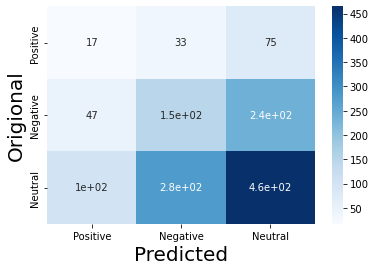

<Figure size 720x504 with 0 Axes>

In [47]:
confus_m = pd.DataFrame(confusion_matrix (y_test,st_y_pred), index = [index_val for index_val in target],
              columns = [index_val for index_val in target])

sn.heatmap(confus_m, annot=True,cmap=plt.cm.Blues)
print(confusion_matrix (y_test,st_y_pred))
print(classification_report(y_test,st_y_pred,target_names=target))
print("F1_Score:",f1_score(y_test,st_y_pred,average="macro"))
print("Accuracy:",accuracy_score(y_test,st_y_pred))

plt.ylabel("Origional",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.figure(figsize = (10,7))

# Train Test Sobel

In [22]:
X=sobel_featSplit
y=images_feature["Labels"].astype("int")

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=75)

print('Shape of X_train:', X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
#target
target=["Positive","Negative","Neutral"]

Shape of X_train: (5592, 16900)
Shape of X_test: (1399, 16900)
Shape of y_train: (5592,)
Shape of y_test: (1399,)


# K Neighbours with Sobel

In [ ]:
knn=KNeighboursClassifier()

In [60]:
knn_y_pred=knn.predict(X_test)
knn_y_pred


array([ 1,  1,  1, ...,  1, -1,  1])

[[  2  36  87]
 [  7 123 299]
 [ 15 223 607]]
              precision    recall  f1-score   support

    Positive       0.08      0.02      0.03       125
    Negative       0.32      0.29      0.30       429
     Neutral       0.61      0.72      0.66       845

    accuracy                           0.52      1399
   macro avg       0.34      0.34      0.33      1399
weighted avg       0.48      0.52      0.49      1399

F1_Score: 0.33022513494493044
Accuracy: 0.5232308791994281


<Figure size 720x504 with 0 Axes>

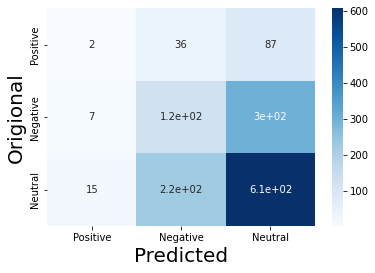

<Figure size 720x504 with 0 Axes>

In [61]:
confus_m = pd.DataFrame(confusion_matrix (y_test,knn_y_pred), index = [index_val for index_val in target],
              columns = [index_val for index_val in target])

sn.heatmap(confus_m, annot=True,cmap=plt.cm.Blues)
print(confusion_matrix (y_test,knn_y_pred))
print(classification_report(y_test,knn_y_pred,target_names=target))
print("F1_Score:",f1_score(y_test,knn_y_pred,average="macro"))
print("Accuracy:",accuracy_score(y_test,knn_y_pred))

plt.ylabel("Origional",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.figure(figsize = (10,7))

# Importing Data

In [ ]:
training_data=pd.read_csv("labels.csv",index_col=0)
training_data

In [ ]:
training_data["text_corrected"].info()
training_data["text_corrected"].isnull().sum()

# training_data["overall_sentiment"].info()
# training_data["overall_sentiment"].isnull().sum()

In [ ]:
extract_cols=training_data[["text_corrected","overall_sentiment","image_name"]]
extract_cols.overall_sentiment[extract_cols.overall_sentiment=="very_positive"]=1
extract_cols.overall_sentiment[extract_cols.overall_sentiment=="positive"]=1
extract_cols.overall_sentiment[extract_cols.overall_sentiment=="negative"]=-1
extract_cols.overall_sentiment[extract_cols.overall_sentiment=="very_negative"]=-1
extract_cols.overall_sentiment[extract_cols.overall_sentiment=="neutral"]=0
extract_cols

# Droping Nan Rows

In [ ]:
extract_cols=extract_cols.dropna(axis=0).reset_index(drop=1)
extract_cols

# Cleaning Data

In [ ]:
def remove_garbage(df_textCorrect):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    for index in range(len(df_textCorrect)):
        clean_list=[]
        for line in df_textCorrect.iloc[index]:
            for letter in line:
                if(letter not in string.punctuation):
                    clean_list.append(letter.lower())
        df_textCorrect.iloc[index]="".join(clean_list)  
        
    stops = set(stopwords.words('english'))
    for index in range(len(df_textCorrect)):
        clean_list=[]
        for line in df_textCorrect.iloc[index].split():
            if line not in stops:
                line=(line.replace("\\"," ").replace("_"," ").replace("\n"," "))
                clean_list.append(line)
        df_textCorrect.iloc[index]=" ".join(clean_list)  
        
    for index in range(len(df_textCorrect)):
        df_textCorrect.iloc[index]=re.sub(emoji_pattern, '',df_textCorrect.iloc[index])
        
    return df_textCorrect

extract_cols["text_corrected"]=remove_garbage(extract_cols["text_corrected"])
extract_cols


In [53]:
extract_cols.isnull().sum()

text_corrected       0
overall_sentiment    0
image_name           0
dtype: int64

# WRITING TO A FILE

In [54]:
cleaned_labels=extract_cols.to_csv("cleaned_labels.csv",index=False)

In [ ]:
extract_col=pd.read_csv("cleaned_labels.csv")
extract_col=extract_col.dropna(axis=0).reset_index(drop=1)
extract_col

# Creating sparse matrix ,converting text to numeric

In [235]:
X=extract_cols["text_corrected"]
y=extract_cols["overall_sentiment"].astype("int")

tfObject=TfidfVectorizer(max_features=7000)
X=tfObject.fit_transform(X)

#6987 rows and 10000 features for each row
print("shape of taining data with features:",X.shape)
#using train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=63)


# std_sc=StandardScaler()
# X_train = std_sc.fit_transform(X_train.toarray())
# X_test = std_sc.fit_transform (X_test.toarray())

print('Shape of X_train:', X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
#target
target=["Positive","Negative","Neutral"]

shape of taining data with features: (6987, 7000)
Shape of X_train: (5589, 7000)
Shape of X_test: (1398, 7000)
Shape of y_train: (5589,)
Shape of y_test: (1398,)


# 1st Model LinearSVC

In [87]:
svcClass= LinearSVC(class_weight="balanced")
svcClass=svcClass.fit(X_train,y_train)

In [88]:
y_pred=svcClass.predict(X_test)
y_pred

array([-1,  0,  0, ...,  0,  0,  0])

[[ 17  35  69]
 [ 37 134 273]
 [ 84 229 520]]
              precision    recall  f1-score   support

    Positive       0.12      0.14      0.13       121
    Negative       0.34      0.30      0.32       444
     Neutral       0.60      0.62      0.61       833

    accuracy                           0.48      1398
   macro avg       0.35      0.36      0.35      1398
weighted avg       0.48      0.48      0.48      1398

F1_Score: 0.35437774634377756
Accuracy: 0.4799713876967096


<Figure size 720x504 with 0 Axes>

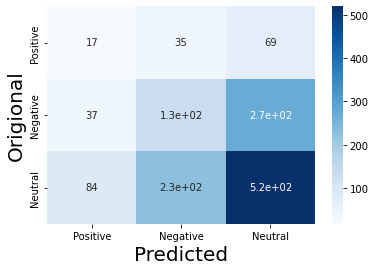

<Figure size 720x504 with 0 Axes>

In [89]:
confus_m = pd.DataFrame(confusion_matrix (y_test,y_pred), index = [index_val for index_val in target],
              columns = [index_val for index_val in target])
sn.heatmap(confus_m, annot=True,cmap=plt.cm.Blues)
print(confusion_matrix (y_test,y_pred))

#.........................Report...............................
print(classification_report(y_test,y_pred,target_names=target))
print("F1_Score:",f1_score(y_test,y_pred,average="macro"))
print("Accuracy:",accuracy_score(y_test,y_pred))

plt.ylabel("Origional",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.figure(figsize = (10,7))


# 2nd Model ExtraTreesClassifier()

In [210]:
ex_model = ExtraTreesClassifier()
ex_model=ex_model.fit(X_train,y_train)
ex_model

ExtraTreesClassifier()

In [211]:
ex_y_pred=ex_model.predict(X_test)
ex_y_pred

array([-1,  0,  1, ...,  1,  1,  1])

[[  7  31  83]
 [ 12  99 333]
 [ 33 167 633]]
              precision    recall  f1-score   support

    Positive       0.13      0.06      0.08       121
    Negative       0.33      0.22      0.27       444
     Neutral       0.60      0.76      0.67       833

    accuracy                           0.53      1398
   macro avg       0.36      0.35      0.34      1398
weighted avg       0.48      0.53      0.49      1398

F1_Score: 0.3402733207806942
Accuracy: 0.5286123032904149


<Figure size 720x504 with 0 Axes>

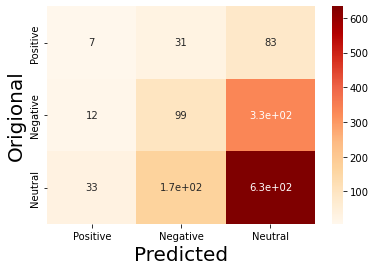

<Figure size 720x504 with 0 Axes>

In [212]:
confus_m = pd.DataFrame(confusion_matrix (y_test,ex_y_pred), index = [index_val for index_val in target],
              columns = [index_val for index_val in target])

sn.heatmap(confus_m, annot=True,cmap= "OrRd")
print(confusion_matrix (y_test,ex_y_pred))
print(classification_report(y_test,ex_y_pred,target_names=target))
print("F1_Score:",f1_score(y_test,ex_y_pred,average="macro"))
print("Accuracy:",accuracy_score(y_test,ex_y_pred))

plt.ylabel("Origional",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.figure(figsize = (10,7))

# 3rd Model Logistic Regression

In [63]:
logicClass =LogisticRegression(class_weight="balanced",C=2)
logicClass=logicClass.fit(X_train, y_train)

In [64]:
logic_y_pred=logicClass.predict(X_test)
logic_y_pred

array([-1,  0,  0, ...,  0,  0,  0])

[[ 18  44  59]
 [ 50 165 229]
 [114 275 444]]
              precision    recall  f1-score   support

          -1       0.10      0.15      0.12       121
           0       0.34      0.37      0.36       444
           1       0.61      0.53      0.57       833

    accuracy                           0.45      1398
   macro avg       0.35      0.35      0.35      1398
weighted avg       0.48      0.45      0.46      1398

F1_Score: 0.34727582334635354


<Figure size 720x504 with 0 Axes>

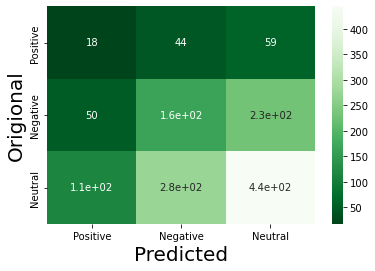

<Figure size 720x504 with 0 Axes>

In [65]:
confus_m = pd.DataFrame(confusion_matrix (y_test,logic_y_pred), index = [index_val for index_val in target],
              columns = [index_val for index_val in target])
sn.heatmap(confus_m, annot=True,cmap= "Greens_r")

print(confusion_matrix (y_test,logic_y_pred))
print(classification_report(y_test,logic_y_pred))
print("F1_Score:",f1_score(y_test,logic_y_pred,average="macro"))

plt.ylabel("Origional",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
plt.figure(figsize = (10,7))

# Model Saving

In [228]:
file1="sentiment_svc"
pickle.dump(svcClass,open(file1,"wb"))

file2="sentiment_logistic"
pickle.dump(logicClass,open(file2,"wb"))

file3="sentiment_extraTree"
pickle.dump(ex_model,open(file3,"wb"))

file4="img_multi_model"
pickle.dump(multi_model,open(file4,"wb"))

file5="img_lda"
pickle.dump(lda,open(file5,"wb"))

file6="img_st"
pickle.dump(st,open(file6,"wb"))

# Voting

# Text votes

In [236]:
text_estimators=[]
text_estimators.append(("LSVC",svcClass))
text_estimators.append(("ExtraTree",ex_model))
text_estimators.append(("LR",logicClass))
hard_level1=VotingClassifier(estimators=text_estimators,voting="hard")
hard_level1=hard_level1.fit(X_train,y_train)
text_y_pred=hard_level1.predict(X_test)
acc=accuracy_score(y_test,text_y_pred)
print("Text_accuracy:",acc)
f1=f1_score(y_test,text_y_pred,average="macro")
print("f1_score:",f1)

Text_accuracy: 0.47782546494992845
f1_score: 0.352621967531888


# Image Votes

In [222]:
img_estimators=[]
img_estimators.append(("multin",multi_model))
text_estimators.append(("lda",lda))
text_estimators.append(("decision",st))
hard_level=VotingClassifier(estimators=img_estimators,voting="hard")
hard_level=hard_level.fit(X_train,y_train)
y_pred=hard_level.predict(X_test)
acc_img=accuracy_score(y_test,y_pred)
print("IMG_accuracy:",acc_img)
f1_img=f1_score(y_test,y_pred,average="macro")
print("f1_score:",f1_img)

IMG_accuracy: 0.455325232308792
f1_score: 0.3595149682917366


# Voting On basis of text train

In [238]:
hard_level_final=VotingClassifier(estimators=[('clf', hard_level1), ('clf2', hard_level)],voting="hard")
hard_level_final=hard_level_final.fit(X_train,y_train)
final_pred=hard_level_final.predict(X_test)
acc=accuracy_score(y_test,final_pred)
print("Final_accuracy:",acc)
f1=f1_score(y_test,final_pred,average="macro")
print("Final_f1_score:",f1)

Final_accuracy: 0.47567954220314734
Final_f1_score: 0.34968579685856155


# voting on basis of Image train split

In [241]:
hard_level_final=VotingClassifier(estimators=[('clf', hard_level1), ('clf2', hard_level)],voting="hard")
hard_level_final=hard_level_final.fit(X_train,y_train)
final_pred=hard_level_final.predict(X_test)
acc=accuracy_score(y_test,final_pred)
print("Final_accuracy:",acc)
f1=f1_score(y_test,final_pred,average="macro")
print("Final_f1_score:",f1)

Final_accuracy: 0.5103645461043602
Final_f1_score: 0.3510407363499077


# Loading Models

In [247]:
text_model1 = pickle.load(open('sentiment_svc', 'rb'))
text_model2 = pickle.load(open('sentiment_logistic', 'rb'))
text_model3 = pickle.load(open('sentiment_extraTree', 'rb'))

img_model1 = pickle.load(open('img_multi_model', 'rb'))
img_model2 = pickle.load(open('img_lda', 'rb'))
img_model3= pickle.load(open('img_st', 'rb'))

In [251]:
img_model3

DecisionTreeClassifier()

Thankyou